In [107]:
import cv, cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.9 


In [108]:
# Load the image
img = cv2.imread('../img/kelvin_cropped/img_001_anniesfruitybunnies_cropped.png') # BGR order
alpha_img = cv2.imread('../img/kelvin_cropped/img_001_anniesfruitybunnies_cropped.png', cv2.IMREAD_UNCHANGED)
gray = cv2.imread('../img/kelvin_cropped/img_001_anniesfruitybunnies_cropped.png', 0)

# gray = cv2.cvtColor(alpha_img, cv2.COLOR_BGR2GRAY);

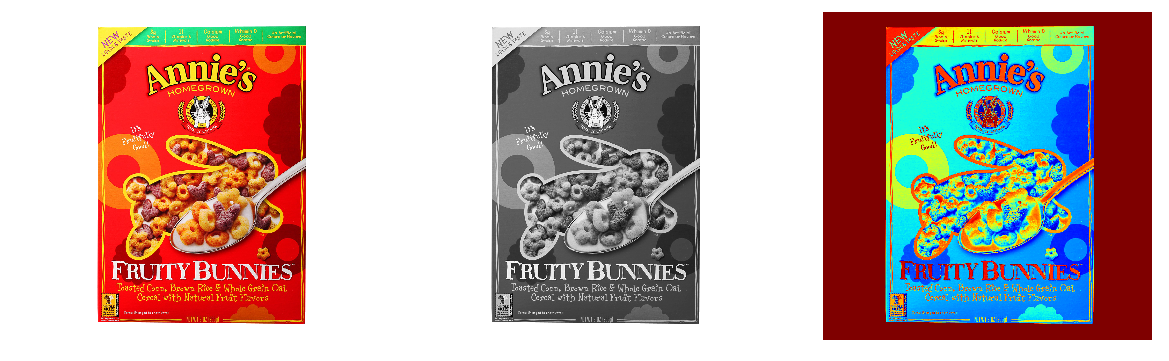

In [109]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1),plt.imshow(cv2.cvtColor(alpha_img, cv2.COLOR_BGR2RGB));
plt.axis('off');

plt.subplot(1, 3, 2),plt.imshow(gray,cmap='gray');
plt.axis('off');

plt.subplot(1, 3, 3),plt.imshow(gray);
plt.axis('off');

In [110]:
print gray.shape
print alpha_img.shape
print 'Number of pixels: ' + str(alpha_img.shape[0] * alpha_img.shape[1])

(1600, 1600)
(1600, 1600, 4)
Number of pixels: 2560000


In [111]:
# Return number of pixels with alpha channel = 0 (background)
def getAlphaPixel(alpha_img):
    count = 0
    for i in range(alpha_img.shape[0]):
        for j in range(alpha_img.shape[1]):
            if(alpha_img[i][j][3] == 0):
                count += 1
    return count

In [122]:
AlphaNum = getAlphaPixel(alpha_img)
print AlphaNum

1101408


In [123]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

In [124]:
print hist[-1]

[ 1101595.]


In [125]:
# Remove the background
hist[-1] = hist[-1] - AlphaNum

In [126]:
print hist[-1]

[ 187.]


(0, 256)

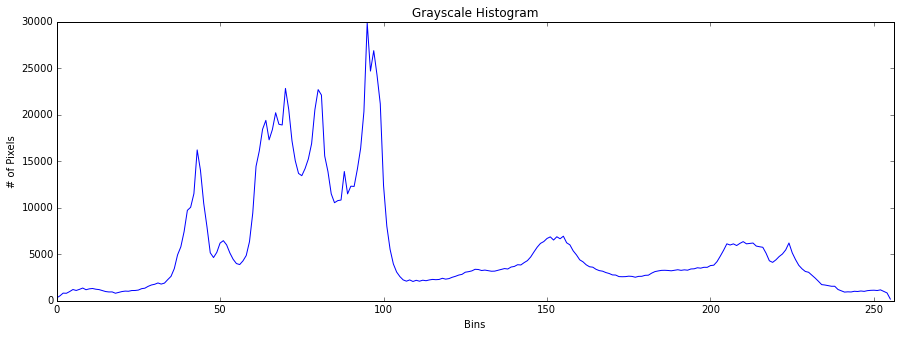

In [127]:
plt.figure()
plt.figure(figsize=(15,5))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

In [133]:
def getPeakIndex(hist):
    peak = hist[0]
    peakIdx = 0
    for i in range(256):
        if(hist[i] > peak):
            peak = hist[i]
            peakIdx = i
    return peakIdx

In [134]:
getPeakIndex(hist)

95